### **Question 1:**
Attach the dataset and mentioned problem statement below,

● A sizable department has to be maintained, for the purposes of recruiting new talent

● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company

● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed
right away.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
data_to_load = files.upload()

Saving general_data.csv to general_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['general_data.csv']))

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### **Data Exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

NumCompaniesWorked had 19 empty cells and Total Working Years had 9 empty cells

In [8]:
df.duplicated().sum()

0

No duplicated rows.

In [63]:
# To drop null values

df = df.dropna (axis=0)

### **Univariate Analysis**

In [65]:
df_sub = df[['Age','DistanceFromHome','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [66]:
df_sub.describe()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,65061.702419,11.290278,7.010497,2.191693,4.126198
std,9.137272,8.105396,47142.310175,7.785717,6.129351,3.224994,3.569674
min,18.000000,1.000000,10090.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,29110.000000,6.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,49190.000000,10.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,83790.000000,15.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,199990.000000,40.000000,40.000000,15.000000,17.000000


In [67]:
a = df_sub.mean()

In [68]:
b = df_sub.median()

In [69]:
c = df_sub.mode()
c

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,23420,10.0,5,0,2


In [70]:
d = df_sub.var()

In [71]:
e = df_sub.std()

In [72]:
Q1 = df_sub.quantile(0.25)
Q3 = df_sub.quantile(0.75)
f = Q3 - Q1

In [73]:
g = df_sub.skew()

In [74]:
h = df_sub.kurt()

In [112]:
# To tabulate the descriptive statistic values of continuos data

data = {'Mean': a,
        'Median': b,
        'Variance' : d,
        'Standard Deviation' : e,
        'IQR' : f,
        'Skewness': g,
        'Kurtosis' : h}
summary = pd.DataFrame.from_dict(data)
summary

,Mean,Median,Variance,Standard Deviation,IQR,Skewness,Kurtosis
Age,36.933364,36.0,8.348974e+01,9.137272,13.0,0.413048,-0.409517
DistanceFromHome,9.198996,7.0,6.569744e+01,8.105396,12.0,0.955517,-0.230691
MonthlyIncome,65061.702419,49190.0,2.222397e+09,47142.310175,54680.0,1.367457,0.990836
TotalWorkingYears,11.290278,10.0,6.061739e+01,7.785717,9.0,1.115419,0.909316
YearsAtCompany,7.010497,5.0,3.756894e+01,6.129351,6.0,1.764619,3.930726
YearsSinceLastPromotion,2.191693,1.0,1.040059e+01,3.224994,3.0,1.980992,3.592162
YearsWithCurrManager,4.126198,3.0,1.274257e+01,3.569674,5.0,0.834277,0.170703


## Inference from the analysis:

All the above variables show positive skewness (skewed to the right), which means the mean > median.

Age & Distance_From_Home are platykurtic and all other variables are leptokurtic.

The Monthly_Income’s IQR is at 54.5k, suggesting that company wide attrition across all income bands

### **Boxplots**

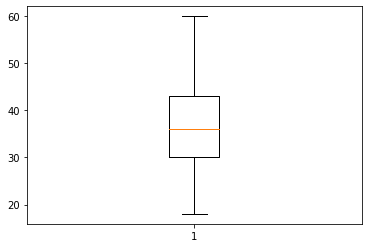

In [76]:
plt.boxplot(df.Age)
plt.show()

Age is normally distributed without any outliers.

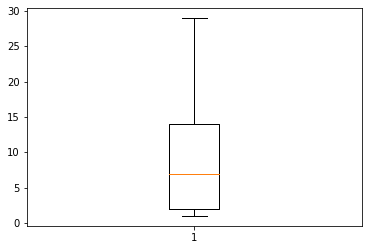

In [77]:
plt.boxplot(df.DistanceFromHome)
plt.show()

Distance from Home is right skewed with no outliers observed

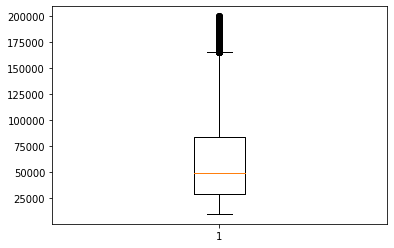

In [78]:
plt.boxplot(df.MonthlyIncome)
plt.show()

Monthly Income is right skewed with several outliers

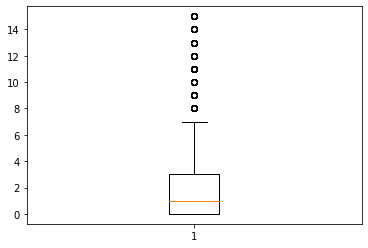

In [79]:
plt.boxplot(df.YearsSinceLastPromotion)
plt.show()

Years since Last Promotion is right skewed with several outliers

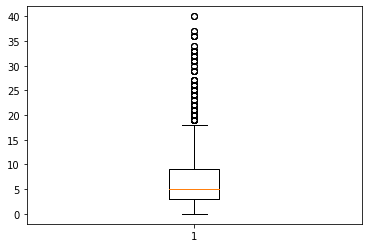

In [80]:
plt.boxplot(df.YearsAtCompany)
plt.show()

Years at Company is also right skewed with several outliers

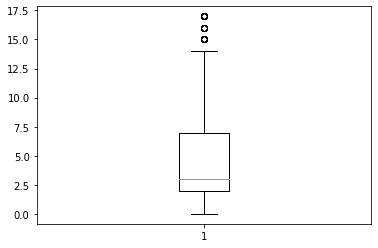

In [81]:
plt.boxplot(df.YearsWithCurrManager)
plt.show()

Years with Current Manager is also right skewed with several outliers

### **Corelation**

In [82]:
# To change the Attrition column to numerical values

Attrition = {'No': 0,
             'Yes' : 1}

df.replace (Attrition, inplace=True)

**Relationship between Attrition and Age**

In [99]:
from scipy.stats import pearsonr

stats, p = pearsonr(df.Attrition, df.Age)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Distance from Home \n')
print ('Alternative hypothesis = There is correlation between Attrition and Distance from Home\n')
if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  Age = 'No correlation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    Age = '+ve correlation'
  else:
    print ('It\'s a negative correlation')
    Age = '-ve correlation'

-0.1583986795409671 5.1265982193780794e-26

Null hypothesis = There is no correlation between Attrition and Distance from Home 

Alternative hypothesis = There is correlation between Attrition and Distance from Home

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


**Relationship between Attrition and Distance from Home**

In [100]:
stats, p = pearsonr(df.Attrition, df.DistanceFromHome)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Distance from Home \n')
print ('Alternative hypothesis = There is correlation between Attrition and Distance from Home\n')
if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  Distance = 'No correlation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    Distance = '+ve correlation'
  else:
    print ('It\'s a negative correlation')
    Distance = '-ve correlation'

-0.009448638515156291 0.5317715668018396

Null hypothesis = There is no correlation between Attrition and Distance from Home 

Alternative hypothesis = There is correlation between Attrition and Distance from Home

p-value is > 0.05. Null hypothesis is accepted. There is no correlation


**Relationship between Attrition and Monthly Income**

In [101]:
stats, p = pearsonr(df.Attrition, df.MonthlyIncome)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Monthly Income \n')
print ('Alternative hypothesis = There is correlation between Attrition and Monthly Income\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  Income = 'no correlation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    Income = '+ve correlation'
  else:
    print ('It\'s a negative correlation')
    Income = '-ve correlation'

-0.030160293808460668 0.045890862744719166

Null hypothesis = There is no correlation between Attrition and Monthly Income 

Alternative hypothesis = There is correlation between Attrition and Monthly Income

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


**Relationship between Attrition and Total Working Years**

In [102]:
stats, p = pearsonr(df.Attrition, df.TotalWorkingYears)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Total Working Years \n')
print ('Alternative hypothesis = There is correlation between Attrition and Total Working Years\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  WorkYears = 'No corelation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    WorkYears = '+ve corelation'
  else:
    print ('It\'s a negative correlation')
    WorkYears = '-ve corelation'

-0.16966991684723912 1.1645434967091854e-29

Null hypothesis = There is no correlation between Attrition and Total Working Years 

Alternative hypothesis = There is correlation between Attrition and Total Working Years

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


**Relationship between Attrition and Year at Company**

In [104]:
stats, p = pearsonr(df.Attrition, df.TotalWorkingYears)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Years at Company \n')
print ('Alternative hypothesis = There is correlation between Attrition and Years at Company\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  CompYears = 'No corelation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    CompYears = '+ve corelation'
  else:
    print ('It\'s a negative correlation')
    CompYears = '-ve corelation'

-0.16966991684723912 1.1645434967091854e-29

Null hypothesis = There is no correlation between Attrition and Years at Company 

Alternative hypothesis = There is correlation between Attrition and Years at Company

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


**Relationship between Attrition and Percentage of Salary Hike**

In [105]:
stats, p = pearsonr(df.Attrition, df.PercentSalaryHike)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Percentage of Salary Hike \n')
print ('Alternative hypothesis = There is correlation between Attrition and Percentage of Salary Hike\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  Hike = 'No corelation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    Hike = '+ve corelation'
  else:
    print ('It\'s a negative correlation')
    Hike = '-ve corelation'

0.033153037135466544 0.028192446935112747

Null hypothesis = There is no correlation between Attrition and Percentage of Salary Hike 

Alternative hypothesis = There is correlation between Attrition and Percentage of Salary Hike

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a positive correlation


**Relationship between Attrition and Years Since Last Promotion**

In [106]:
stats, p = pearsonr(df.Attrition, df.YearsSinceLastPromotion)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Years Since Last Promotion \n')
print ('Alternative hypothesis = There is correlation between Attrition and Years Since Last Promotion\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation')
  PromYear = 'No corelation' 
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    PromYear = '+ve corelation'
  else:
    print ('It\'s a negative correlation')
    PromYear = '-ve corelation'

-0.03142315056330998 0.03752293607394324

Null hypothesis = There is no correlation between Attrition and Years Since Last Promotion 

Alternative hypothesis = There is correlation between Attrition and Years Since Last Promotion

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


**Relationship between Attrition and Years with Current Manager**



In [108]:
stats, p = pearsonr(df.Attrition, df.YearsWithCurrManager)

print (stats,p)

print ('\nNull hypothesis = There is no correlation between Attrition and Years with Current Manager \n')
print ('Alternative hypothesis = There is correlation between Attrition and Years with Current Manager\n')

if p > 0.05: 
  print ('p-value is > 0.05. Null hypothesis is accepted. There is no correlation') 
  ManYear = 'No corelation'
else: 
  print ('p-value is < 0.05. Null hypothesis is rejected. There is correlation')
  if stats > 0 :
    print ('It\'s a positive correlation')
    ManYear = '+ve corelation'
  else:
    print ('It\'s a negative correlation')
    ManYear = '-ve corelation'

-0.15469153690287285 7.105369646772844e-25

Null hypothesis = There is no correlation between Attrition and Years with Current Manager 

Alternative hypothesis = There is correlation between Attrition and Years with Current Manager

p-value is < 0.05. Null hypothesis is rejected. There is correlation
It's a negative correlation


In [120]:
# To tabulate the existance of corelation with Attrition

corr_data = {'Age': Age,
        'Distance From Home': [Distance],
        'Monthly Income' : [Income],
        'Total Working Years' : [WorkYears],
        'Years at Company' : [CompYears],
        'Percentage of Salary Hike' : [Hike],
        'Years Since Last Promotion': [PromYear],
        'Years with Current Manager' : [ManYear]}
corr_summary = pd.DataFrame.from_dict(corr_data, orient='index')
corr_summary = corr_summary.rename (columns={0 : 'Attrition'})
corr_summary

,Attrition
Age,-ve correlation
Distance From Home,[No correlation]
Monthly Income,[-ve correlation]
Total Working Years,[-ve corelation]
Years at Company,[-ve corelation]
Percentage of Salary Hike,[+ve corelation]
Years Since Last Promotion,[-ve corelation]
Years with Current Manager,[-ve corelation]


### **Statistical Tests**

In [121]:
# To separate the dataset into subsets of those who left the company (df1) and those who are still working (df0)

df1= df[df['Attrition']==1]
df0= df[df['Attrition']==0]

### **Mann Whitney Test**

**Attrition and Distance from Home**

In [122]:
from scipy.stats import mannwhitneyu

stats, p = mannwhitneyu(df1.DistanceFromHome, df0.DistanceFromHome)

print (stats,p)


1295261.0 0.488538986087403


H0: There is no significant differences in the Distance From Home between those who left and those who stayed in the company.

Ha: There is significant differences in the Distance From Home between those who left and those who stayed in the company.

Since p > 0.05, null hypothesis is accepted.

**Attrition and Monthly Income**

In [123]:
stats, p = mannwhitneyu(df1.MonthlyIncome, df0.MonthlyIncome)

print (stats,p)

1249573.5 0.06508807631576838


H0: There is no significant differences in the Monthly Income between those who left and those who stayed in the company.

Ha: There is significant differences in the Monthly Income between those who left and those who stayed in the company.

Since p > 0.05, null hypothesis is accepted.

**Attrition and Total Working Years**

In [125]:
stats, p = mannwhitneyu(df1.TotalWorkingYears, df0.TotalWorkingYears)

print (stats,p)

895173.5 2.741211827689903e-39


H0: There is no significant differences in the Total Working Years between those who left and those who stayed in the company.

Ha: There is significant differences in the Total Working Years between those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Years At Company**

In [126]:
stats, p = mannwhitneyu(df1.YearsAtCompany, df0.YearsAtCompany)

print (stats,p)

912579.0 3.3433144809752036e-36


H0: There is no significant differences in the Years at Company between those who left and those who stayed in the company.

Ha: There is significant differences in the Years at Company between those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Percentage of Salary Hike**

In [124]:
stats, p = mannwhitneyu(df1.PercentSalaryHike, df0.PercentSalaryHike)

print (stats,p)

1231873.5 0.017810794960084964


H0: There is no significant differences in the percentage of salary hike between those who left and those who stayed in the company.

Ha: There is significant differences in the percentage of salary hike between those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Years Since Last Promotion**

In [127]:
stats, p = mannwhitneyu(df1.YearsSinceLastPromotion, df0.YearsSinceLastPromotion)

print (stats,p)

1196606.0 0.00037904698157957496


H0: There is no significant differences in the years since last promotion between those who left and those who stayed in the company.

Ha: There is significant differences in the years since last promotion  between those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Years with Current Manager**

In [128]:
stats, p = mannwhitneyu(df1.YearsWithCurrManager, df0.YearsWithCurrManager)

print (stats,p)

945958.5 5.420302388722274e-31


H0: There is no significant differences in the years with current manager between those who left and those who stayed in the company.

Ha: There is significant differences in the years with current manager between those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.



### **Two sample Independent t-test**

In [138]:
from scipy.stats import ttest_ind

stats, p = ttest_ind(df1.Age, df0.Age)

print (stats,p)

-10.617111568458819 5.126598219406314e-26


H0: There is no significant differences in the age of those who left and those who stayed in the company.

Ha: There is significant differences in the age of those who left and those who stayed in the company.

Since p < 0.05, alternative hypothesis is accepted.

### **Chi Square Test**

In [167]:
df_categorical = df[['Attrition', 'BusinessTravel', 'Department','Education', 'EducationField','Gender',
       'JobLevel', 'JobRole', 'MaritalStatus','StockOptionLevel']]

from sklearn.preprocessing import LabelEncoder
df_coded = df_categorical.apply(LabelEncoder().fit_transform)

**Attrition and Marital Status**

In [149]:
from scipy.stats import chi2_contingency

# Divorded = 0, Married = 1, Single = 2

chitable = pd.crosstab (df_coded.Attrition, df_coded.MaritalStatus)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

MaritalStatus    0     1     2
Attrition                     
0              872  1756  1049
1               98   251   356 

133.85785802925156 8.573051828219379e-30


H0: There is no dependency between Attrition and Marital Status.

Ha: There is dependency between Attrition and Marital Status.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Business Travel**

In [151]:
# Non Travel = 0, Travel Frequently = 1, Travel Rarely = 2

chitable = pd.crosstab (df_coded.Attrition, df_coded.BusinessTravel)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

BusinessTravel    0    1     2
Attrition                     
0               412  621  2644
1                36  204   465 

70.07594084831366 6.07019702736392e-16


H0: There is no dependency between Attrition and Business Travel.

Ha: There is dependency between Attrition and Business Travel.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Department**

In [153]:
# Human Resources = 0, Research & Development = 1, Sales = 2

chitable = pd.crosstab (df_coded.Attrition, df_coded.Department)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

Department    0     1     2
Attrition                  
0           132  2416  1129
1            55   449   201 

25.89432541916022 2.382970570769315e-06


H0: There is no dependency between Attrition and Department.

Ha: There is dependency between Attrition and Department.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Education**

In [156]:
# Below College = 0, College = 1, Bachelor = 2, Masters = 3, Doctor = 4

chitable = pd.crosstab (df_coded.Attrition, df_coded.Education)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

Education    0    1     2     3    4
Attrition                           
0          430  683  1438  1003  123
1           78  159   263   185   20 

6.2735361781270615 0.17963050984273224


H0: There is no dependency between Attrition and Education.

Ha: There is dependency between Attrition and Education.

Since p > 0.05, null hypothesis is accepted.

**Attrition and Education Field**

In [158]:
chitable = pd.crosstab (df_coded.Attrition, df_coded.EducationField)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

EducationField   0     1    2     3    4    5
Attrition                                    
0               48  1505  400  1163  214  347
1               32   301   75   222   30   45 

43.132860148900384 3.472896220587872e-08


H0: There is no dependency between Attrition and Education Field.

Ha: There is dependency between Attrition and Education Field.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Gender**

In [160]:
# Female = 0, Male = 1

chitable = pd.crosstab (df_coded.Attrition, df_coded.Gender)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

Gender        0     1
Attrition            
0          1488  2189
1           268   437 

1.3825823839528295 0.23966176275638887


H0: There is no dependency between Attrition and Gender.

Ha: There is dependency between Attrition and Gender.

Since p > 0.05, null hypothesis is accepted.

**Attrition and Job Level**

In [164]:
chitable = pd.crosstab (df_coded.Attrition, df_coded.JobLevel)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

JobLevel      0     1    2    3    4
Attrition                           
0          1369  1307  555  267  179
1           250   283   96   51   25 

7.036480574687178 0.13397290697032432


H0: There is no dependency between Attrition and Job Level.

Ha: There is dependency between Attrition and Job Level.

Since p > 0.05, null hypothesis is accepted.

**Attrition and Job Role**

In [165]:
chitable = pd.crosstab (df_coded.Attrition, df_coded.JobRole)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

JobRole      0    1    2    3    4    5    6    7    8
Attrition                                             
0          333  135  648  263  381  183  714  810  210
1           56   21  125   42   48   54  158  165   36 

21.893724958847 0.005116592717526599


H0: There is no dependency between Attrition and Job Role.

Ha: There is dependency between Attrition and Job Role.

Since p < 0.05, alternative hypothesis is accepted.

**Attrition and Stock Option Level**

In [166]:
chitable = pd.crosstab (df_coded.Attrition, df_coded.StockOptionLevel)
print (chitable,'\n')

stats, p, dof, expeted = chi2_contingency (chitable)
print (stats, p)

StockOptionLevel     0     1    2    3
Attrition                             
0                 1564  1509  388  216
1                  316   267   84   38 

3.444801419724394 0.32799207189761653


H0: There is no dependency between Attrition and Stock Option Level.

Ha: There is dependency between Attrition and Stock Option Level.

Since p > 0.05, null hypothesis is accepted.

### **Preliminary Conclusion**

From the analysis above, the probable variables that are important to be addressed includes:

1.   Age
2.   Total Working Years
3.   Years with Current Manager
4.   Percentage of Salary Hike
5.   Years since Last promotion
6.   Marital Status
7.   Department
8.   Business Travel
9.   Education Field
10.  Job Role


